In [1]:
import os
import glob
from functools import reduce

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
results_dir = "../../results/"
base_dir = "timeseries/time-scales/"
arrival_rates = ["1_X_max",
                "2_X_max",
                "3_X_max"]
run_type = "single-backend"
fluctuation_timeperiod = "500ms-fluctuation"
run_time = "5mins-run"
feedback_intervals = ["5ms-feedback", "25ms-feedback", "205ms-feedback", "505ms-feedback", 
                      "1.005s-feedback", "5.005s-feedback"]
algos = ["wlc", 
         "feedback-wlc"]
runs = ["run"]

## Response rate

In [5]:
rr_percentiles = ['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
                  'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
                  'Response rate 99%', 'Response rate 100%'] 

In [8]:
rr_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + "*/" + run_type + "/" +  fluctuation_timeperiod + "/" + 
                   run_time + "/*/*/*/" + "response_rate.csv"):
    for arrival_rate in arrival_rates:
        if ("/"+arrival_rate+"/") in i:
            for feedback_interval in feedback_intervals:
                if ("/"+feedback_interval+"/") in i:
                    for algo in algos:
                        if ("/"+algo+"/") in i:
                            for run in runs:
                                if run in i:
                                    rr_plot_data_dict[arrival_rate+":"+feedback_interval+":"+algo] = pd.read_csv(i, header=0, na_filter=False)

In [9]:
rr_plot_data = pd.DataFrame()
rr_plot_data['percentiles'] = rr_percentiles

rr_plot_percentile_dict = {}
for i in rr_percentiles:
    for k in rr_plot_data_dict:
        if k in rr_plot_percentile_dict:
            rr_plot_percentile_dict[k].append(rr_plot_data_dict[k][i][0])
        else:
            rr_plot_percentile_dict[k] = []
            rr_plot_percentile_dict[k].append(rr_plot_data_dict[k][i][0])
            
for k in rr_plot_data_dict:
    rr_plot_data[k] = rr_plot_percentile_dict[k]
    
rr_plot_data.columns.values

array(['percentiles', '2_X_max:1.005s-feedback:feedback-wlc',
       '2_X_max:5ms-feedback:feedback-wlc',
       '1_X_max:205ms-feedback:feedback-wlc', '3_X_max:5ms-feedback:wlc',
       '1_X_max:1.005s-feedback:wlc', '3_X_max:25ms-feedback:feedback-wlc',
       '3_X_max:5ms-feedback:feedback-wlc',
       '3_X_max:1.005s-feedback:feedback-wlc', '1_X_max:25ms-feedback:wlc',
       '2_X_max:25ms-feedback:feedback-wlc',
       '1_X_max:505ms-feedback:feedback-wlc',
       '3_X_max:505ms-feedback:feedback-wlc', '1_X_max:5ms-feedback:wlc',
       '2_X_max:205ms-feedback:feedback-wlc',
       '1_X_max:25ms-feedback:feedback-wlc',
       '1_X_max:5ms-feedback:feedback-wlc',
       '1_X_max:1.005s-feedback:feedback-wlc',
       '1_X_max:205ms-feedback:wlc', '3_X_max:205ms-feedback:feedback-wlc',
       '2_X_max:5.005s-feedback:feedback-wlc',
       '3_X_max:5.005s-feedback:feedback-wlc',
       '1_X_max:5.005s-feedback:feedback-wlc',
       '1_X_max:505ms-feedback:wlc', '1_X_max:5.005s-feedbac

In [10]:
# rr_plot_data.plot('percentiles', kind='bar')

## Response time

In [11]:
rt_percentiles = ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
                  'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
                  'Response time 99%', 'Response time 100%']

In [15]:
rt_plot_data_dict = {}

for i in glob.glob(results_dir + base_dir + "*/" + run_type + "/" +  fluctuation_timeperiod + "/" + 
                   run_time + "/*/*/*/" + "response_time.csv"):
    for arrival_rate in arrival_rates:
        if ("/"+arrival_rate+"/") in i:
            for feedback_interval in feedback_intervals:
                if ("/"+feedback_interval+"/") in i:
                    for algo in algos:
                        if ("/"+algo+"/") in i:
                            for run in runs:
                                if run in i:
                                    rt_plot_data_dict[arrival_rate+":"+feedback_interval+":"+algo] = pd.read_csv(i, header=0, na_filter=False)

In [16]:
rt_plot_data = pd.DataFrame()
rt_plot_data['percentiles'] = rt_percentiles

rt_plot_percentile_dict = {}
for i in rt_percentiles:
    for k in rt_plot_data_dict:
        if k in rt_plot_percentile_dict:
            rt_plot_percentile_dict[k].append(rt_plot_data_dict[k][i][0])
        else:
            rt_plot_percentile_dict[k] = []
            rt_plot_percentile_dict[k].append(rt_plot_data_dict[k][i][0])
            
for k in rt_plot_data_dict:
    rt_plot_data[k] = rt_plot_percentile_dict[k]
    
rt_plot_data.columns.values

array(['percentiles', '2_X_max:1.005s-feedback:feedback-wlc',
       '2_X_max:5ms-feedback:feedback-wlc',
       '1_X_max:205ms-feedback:feedback-wlc', '3_X_max:5ms-feedback:wlc',
       '1_X_max:1.005s-feedback:wlc', '3_X_max:25ms-feedback:feedback-wlc',
       '3_X_max:5ms-feedback:feedback-wlc',
       '3_X_max:1.005s-feedback:feedback-wlc', '1_X_max:25ms-feedback:wlc',
       '2_X_max:25ms-feedback:feedback-wlc',
       '1_X_max:505ms-feedback:feedback-wlc',
       '3_X_max:505ms-feedback:feedback-wlc', '1_X_max:5ms-feedback:wlc',
       '2_X_max:205ms-feedback:feedback-wlc',
       '1_X_max:25ms-feedback:feedback-wlc',
       '1_X_max:5ms-feedback:feedback-wlc',
       '1_X_max:1.005s-feedback:feedback-wlc',
       '1_X_max:205ms-feedback:wlc', '3_X_max:205ms-feedback:feedback-wlc',
       '2_X_max:5.005s-feedback:feedback-wlc',
       '3_X_max:5.005s-feedback:feedback-wlc',
       '1_X_max:5.005s-feedback:feedback-wlc',
       '1_X_max:505ms-feedback:wlc', '1_X_max:5.005s-feedbac

### Percentiles ...

500ms fluctuation, 0.5 alpha, 0.005 state feedback, 0.001 stat collection.

In [25]:
err_dict = {}
for arrival_rate in arrival_rates:
    for feedback_interval in feedback_intervals:
        for algo in algos:
            err_dict[arrival_rate+":"+feedback_interval+":"+algo] = pd.DataFrame()

index = ['Avg.', '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%', '100%']        
means = pd.DataFrame()
means['percentiles'] = index
errs = pd.DataFrame()
errs['percentiles'] = index

means = means.set_index('percentiles')
errs = errs.set_index('percentiles')

for i in range(len(rt_percentiles)):
    for arrival_rate in arrival_rates:
        for feedback_interval in feedback_intervals:
            for algo in algos:
                if feedback_interval != '5ms-feedback' and algo == 'wlc':
                    continue
                err_list = []
                for run in runs:
                    err_list.append(rt_plot_data[arrival_rate+":"+feedback_interval+":"+algo][i])
                err_dict[arrival_rate+":"+feedback_interval+":"+algo][rt_percentiles[i]] = err_list

for arrival_rate in arrival_rates:
    for feedback_interval in feedback_intervals:
        for algo in algos:
            if feedback_interval != '5ms-feedback' and algo == 'wlc':
                continue
            means[arrival_rate+":"+feedback_interval+":"+algo] = list(err_dict[arrival_rate+":"+feedback_interval+":"+algo].mean())
            errs[arrival_rate+":"+feedback_interval+":"+algo] = list(err_dict[arrival_rate+":"+feedback_interval+":"+algo].std())

In [26]:
means.columns.values

array(['1_X_max:5ms-feedback:wlc', '1_X_max:5ms-feedback:feedback-wlc',
       '1_X_max:25ms-feedback:feedback-wlc',
       '1_X_max:205ms-feedback:feedback-wlc',
       '1_X_max:505ms-feedback:feedback-wlc',
       '1_X_max:1.005s-feedback:feedback-wlc',
       '1_X_max:5.005s-feedback:feedback-wlc', '2_X_max:5ms-feedback:wlc',
       '2_X_max:5ms-feedback:feedback-wlc',
       '2_X_max:25ms-feedback:feedback-wlc',
       '2_X_max:205ms-feedback:feedback-wlc',
       '2_X_max:505ms-feedback:feedback-wlc',
       '2_X_max:1.005s-feedback:feedback-wlc',
       '2_X_max:5.005s-feedback:feedback-wlc', '3_X_max:5ms-feedback:wlc',
       '3_X_max:5ms-feedback:feedback-wlc',
       '3_X_max:25ms-feedback:feedback-wlc',
       '3_X_max:205ms-feedback:feedback-wlc',
       '3_X_max:505ms-feedback:feedback-wlc',
       '3_X_max:1.005s-feedback:feedback-wlc',
       '3_X_max:5.005s-feedback:feedback-wlc'], dtype=object)

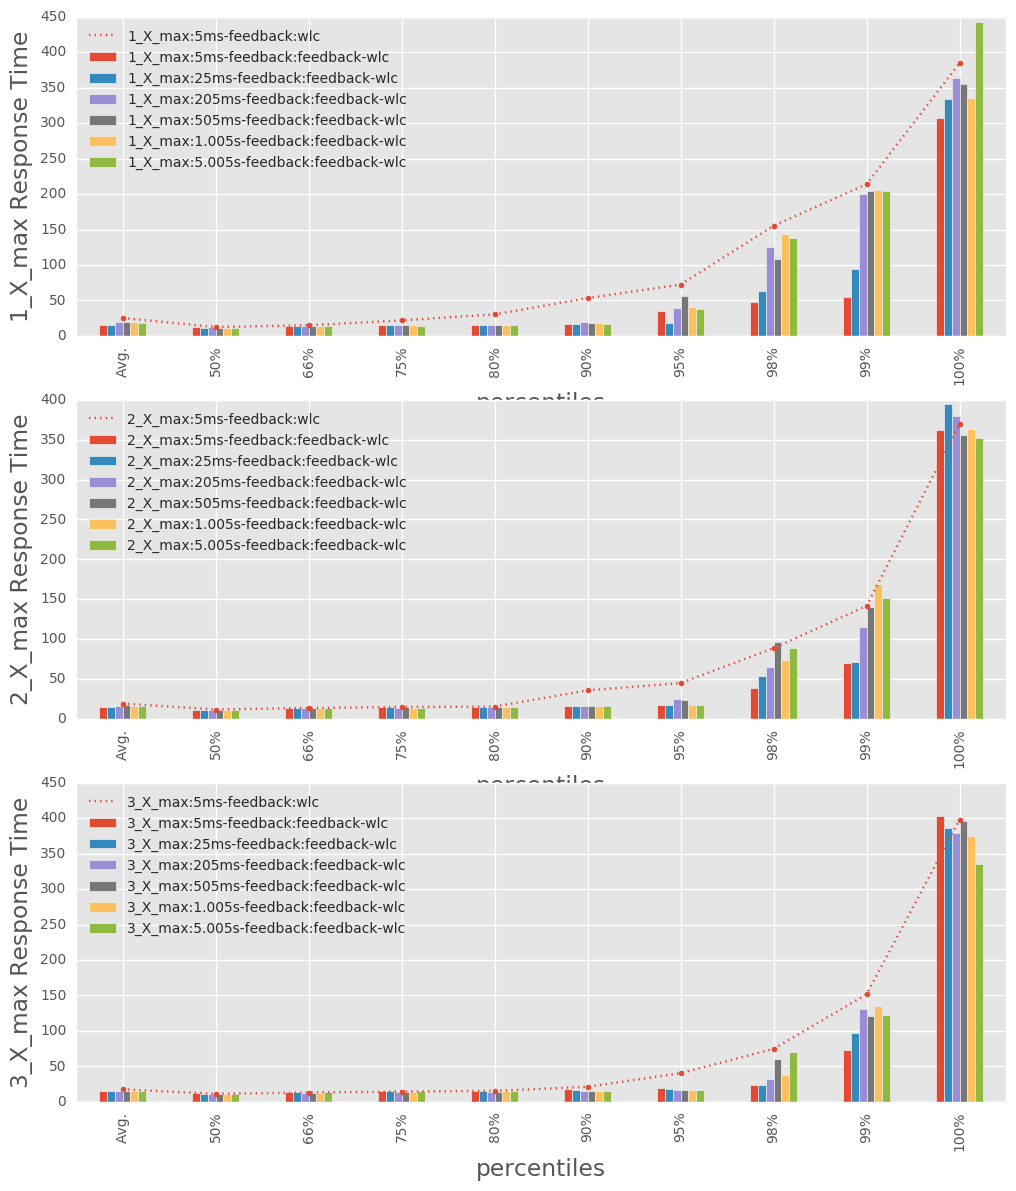

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=1)

for i in range(len(arrival_rates)):
    means[[arrival_rates[i]+":5ms-feedback:wlc"]].plot(kind='line', yerr=errs, figsize=(12,14), linestyle=":", marker='o', markersize=4, ax=ax[i])
    means[[arrival_rates[i]+":5ms-feedback:feedback-wlc",
           arrival_rates[i]+":25ms-feedback:feedback-wlc",
           arrival_rates[i]+":205ms-feedback:feedback-wlc",
           arrival_rates[i]+":505ms-feedback:feedback-wlc",
           arrival_rates[i]+":1.005s-feedback:feedback-wlc",
           arrival_rates[i]+":5.005s-feedback:feedback-wlc"]].plot(kind='bar', yerr=errs, figsize=(12,14), ax=ax[i])
    ax[i].set_ylabel(arrival_rates[i]+' Response Time')

fig.savefig('time-scales-plots-with-wlc-trendline.pdf')

In [21]:
means.describe()

,1_X_max:5ms-feedback:wlc,1_X_max:5ms-feedback:feedback-wlc,1_X_max:25ms-feedback:feedback-wlc,1_X_max:205ms-feedback:feedback-wlc,1_X_max:505ms-feedback:feedback-wlc,1_X_max:1.005s-feedback:feedback-wlc,1_X_max:5.005s-feedback:feedback-wlc,2_X_max:5ms-feedback:wlc,2_X_max:5ms-feedback:feedback-wlc,2_X_max:25ms-feedback:feedback-wlc,...,2_X_max:505ms-feedback:feedback-wlc,2_X_max:1.005s-feedback:feedback-wlc,2_X_max:5.005s-feedback:feedback-wlc,3_X_max:5ms-feedback:wlc,3_X_max:5ms-feedback:feedback-wlc,3_X_max:25ms-feedback:feedback-wlc,3_X_max:205ms-feedback:feedback-wlc,3_X_max:505ms-feedback:feedback-wlc,3_X_max:1.005s-feedback:feedback-wlc,3_X_max:5.005s-feedback:feedback-wlc
count,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,98.517500,53.580000,59.77375,82.615000,81.76500,81.802500,91.390000,75.538750,57.221250,62.425000,...,70.261250,70.855000,69.375000,75.76000,60.971250,61.221250,64.103750,67.613750,65.002500,63.106250
std,120.835245,90.439049,100.21749,117.063766,114.28939,111.210772,139.937157,111.425315,108.491184,118.532025,...,109.405037,114.136799,109.772634,121.33959,121.318284,116.947753,116.665244,120.709785,115.395717,102.303547
min,12.625000,12.000000,11.62500,12.500000,11.87500,11.875000,11.500000,11.750000,11.000000,11.500000,...,11.500000,11.000000,10.875000,11.25000,12.125000,11.750000,10.375000,10.625000,10.875000,11.375000
25%,22.825000,15.125000,14.81250,15.437500,14.90625,15.125000,14.593750,15.031250,14.596875,14.875000,...,14.687500,14.343750,14.125000,14.71875,15.271875,14.709375,13.937500,14.093750,14.343750,14.687500
50%,41.875000,16.275000,15.99375,19.262500,18.82500,18.700000,17.950000,27.506250,15.437500,15.625000,...,16.493750,15.962500,15.812500,19.48750,16.875000,15.750000,14.956250,15.131250,15.450000,15.718750
75%,134.562500,44.875000,52.56250,103.812500,95.53125,117.375000,113.406250,77.687500,33.500000,44.468750,...,78.000000,59.531250,70.500000,66.06250,22.687500,22.343750,28.812500,49.062500,33.093750,56.906250
max,384.750000,307.125000,334.00000,363.875000,355.25000,334.875000,442.500000,369.375000,361.625000,394.750000,...,355.625000,363.375000,352.625000,397.75000,402.375000,385.875000,379.500000,396.500000,375.125000,335.625000
